Question 1:  Naive Bayes Classifier (40 points) 

When a foreigner comes to the States, sometimes they got very confused about baby’s names to tell it is a boy’s name or a girl’s name, like Jack and Jane.  For this question, you will implement a Naive Bayes classifier to classify if a given test baby’s name is a boy’s name or a girl’s name.  In the dataset, you can find a boy’s name list, boynames.csv, which contains 1000 commonly used boy’s names.  You can also find a girl’s name list, girlnames.csv, which contains 1000 commonly used girl’s names.  In order to implement a NB classifier, you need to:

•ComputeP(X|Y)

•ComputeP(Y) but here we don’t need you to compute this as indicated in the hint

•Compute log probability log (P(Y=1|x) / P(Y=−1|x))

•decide the classification result

Hint:

•One critical key here is to convert the strings in names into feature vector.  You may implement this as name2vector.py.  Think about what are some good features for a name string (i.e.  prefixes/suffixes of a boy’s name?  prefixes/suffixes of a girl’s name?  Can you hash them?  ).

•You can assume that the class probability P(boys) = 0.5 and also P(girls) = 0.5.

•Use a multinomial distribution as model.  This will return the probability vectors for all features given a class label.

Questions:

•Implement a NB classifier for the name problem by using the two training filesboynames.csv and girlnames.csv.

•Test your algorithm using the test dataset testnames.csv.  For now you can just output your classification result based on which class has higher probability based on your model.  Export your result as a .csv file, using “-1” to indicate a boy’s name and “+1” to indicate a girl’s name.

In [35]:
import pandas as pd
import math
from scipy.stats import norm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import csv
# bring in data
girlDF = pd.read_csv(r'girl_names.csv')
boyDF = pd.read_csv(r'boy_names.csv')
girlDF = girlDF['x']
boyDF = boyDF['x']
# convert names to feature vectors
# feature dimension function idea credits to cornell university's CS4780 course slides
def hashFeatures(name):
  # make 128 dimensional feature vector
  dimensions = 128; 
  vector = [0] * dimensions; 
  # standardize data
  name=name.lower() 
  # this is hash function for prefix / suffix from cornell
  for m in range(3):
    featurestring='prefix'+name[0:min(m+1,len(name))]
    vector[hash(featurestring) % dimensions]=1
    featurestring='suffix'+name[-1:-min(m+2,len(name)+1):-1]
    vector[hash(featurestring) % dimensions]=1
  return vector

# initialize feature df for boy and girl
girlFeature = [[0]*129 for i in range(1000)]
boyFeature = [[0]*129 for i in range(1000)]

def getVectors(df, vectdf, clfInt):
  rowLoc = 0
  for n in df:
    vect = hashFeatures(n)
    colLoc = 0
    for dim in vect:
      vectdf[rowLoc][colLoc] = dim
      colLoc += 1
    vectdf[rowLoc][colLoc] = clfInt
    rowLoc += 1
  return vectdf
  
boyFeature = pd.DataFrame(getVectors(boyDF, boyFeature, -1))
girlFeature = pd.DataFrame(getVectors(girlDF, girlFeature, 1))
training = pd.concat([boyFeature, girlFeature])

# ComputeP(Y) but here we don’t need you to compute this as indicated in the hint
# the probability that a sample in the training set is positive or negative, independent of its features.
probPos = 0.5
probNeg = 0.5

# Compute P(X|Y)
# given that you know it boy/girl, whats the probability you see specific boy/girl name
# P(X) * P(Y|X) / P(Y)
probGivenBoy = 1 / len(boyFeature.nunique()) 
probGivenGirl = 1 / len(girlFeature.nunique())
# Compute log probability log (P(Y=1|x) / P(Y=−1|x))
# P(Y) P(x|Y) / P(x)
logBoyProb = math.log((probNeg * probGivenBoy) / (probPos * probGivenGirl)) 
logGirlProb =  math.log((probPos * probGivenGirl) / (probNeg * probGivenBoy)) 

# add all data into training dataframe
training = pd.concat([boyFeature, girlFeature])
# randomize training values
training = training.sample(frac = 1) 
train, test = train_test_split(training, test_size=0.2)

# make classifier, train, and test using test_names
clf = MultinomialNB(alpha=0.01)
X = train.iloc[:, :128]
y = train.iloc[:, 128:129]
X = X.values
y = y.values
clf.fit(X,y.ravel())
# test accuracy before classifying test.csv
X = test.iloc[:, :128]
y = test.iloc[:, 128:129]
X = X.values
y = y.values
print("classifier score: " + str(clf.score(X,y.ravel())))

# test classifier accuracy using test data
testData = pd.read_csv(r'test_names.csv')
testData = testData['x']
testFeature = [[0]*129 for i in range(100)]
testFeature = pd.DataFrame(getVectors(testData, testFeature, 0))
testFeature = testFeature.iloc[:, :-1]

names = testData.values
predictions = []
predictionValues = []
predictionVal = clf.predict(testFeature)
for i in range(100):
  st = "name: " + str(names[i]) + " classified as: " + str(predictionVal[i])
  print(st)
  predictionValues.append(str(predictionVal[i]))
  predictions.append(st)

wtr = csv.writer(open ('predictions.csv', 'w'), delimiter=',', lineterminator='\n')
for x in predictions : wtr.writerow ([x])

classifier score: 0.775
name: Brittani classified as: -1
name: Brandin classified as: -1
name: Darry classified as: -1
name: Tresa classified as: 1
name: Fabiola classified as: 1
name: Earnestine classified as: 1
name: Wirt classified as: -1
name: Hallie classified as: -1
name: Lani classified as: 1
name: Evette classified as: 1
name: Thurston classified as: -1
name: Lindbergh classified as: -1
name: Skyla classified as: 1
name: Charlie classified as: -1
name: Cornel classified as: -1
name: Burdette classified as: 1
name: Renard classified as: -1
name: Mariann classified as: 1
name: Kenzie classified as: 1
name: Lee classified as: 1
name: Joella classified as: 1
name: Estefany classified as: -1
name: Alwilda classified as: 1
name: Stephania classified as: 1
name: Glen classified as: -1
name: Grove classified as: -1
name: Graciela classified as: 1
name: Foster classified as: -1
name: Art classified as: -1
name: Aretha classified as: 1
name: Maury classified as: 1
name: Bynum classified 

Question 2:  Support Vector Machine (30 points)

2.1Here is a visualization (Figure 1) of some data points in 2D space (hw2data1.txt):Questions:

•Reuse the perceptron you implemented in HW1 question 3, and try to classify the dataset.

•Implement a SVM to classify the dataset.

•Can you tell the resulting difference between these two algorithms?  And can you make a plot for thetwo hyperplanes learned from these two algorithms?

2.2 Now  that  you  have  some  hands-on  practice  synthetic  data,  here  is  a  real  world  image  classifica-tion  task  called  Fashion-MNIST.  It  is  a  dataset  that  consists  of  60k  training  images  (hw2Xtrain.gz)of  clothing  and  shoes,  and  its  labels  (hw2Ytrain.gz).   It  also  contains  a  separate  set  of  10k  test  im-ages  (hw2Xtest.gz)  and  its  labels  (hw2Ytest.gz).   You  can  read  more  about  the  data  here https://github.com/zalandoresearch/fashion-mnist.

Your goal is to train an SVM using the training set and show your classifier’s accuracy on the test set.You can use the SVM you implemented in Question 1.  A few things to keep in mind:

•Test data is only to be used for testing.  Do not use test data for training.  It should be unseen whiletraining.

•Report both accuracies, i.e.  the train accuracy and the test accuracy.

In [38]:
# MUST RUN THIS TO BRING IN DATA
pip install python-mnist

data extracted
SVM Classifier Train Accuracy: 0.8748333333333334
SVM Classifier Test Accuracy: 0.8748333333333334


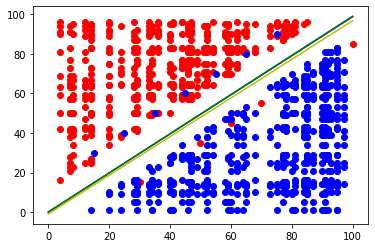

In [4]:
import numpy as np
import pickle
from mnist import MNIST
from zipfile import ZipFile as zip
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import random
# bring in data
data = []
cls = []
xcoord = []
ycoord = []
count = 0
clsNums = []
with open('hw2_data1.txt', "r") as filestream:
  for line in filestream: 
    count += 1
    currentline = line.split(",")
    cls.append(currentline[0])
    if currentline[0] == '+':
      clsNums += [1]
    else:
      clsNums += [-1]
    y = currentline[2].split('/')
    data.append([currentline[1], y[0][:2]])
# print(len(data))
# print(count)
dataNum = []
for i in data:
  dataNum.append([int(i[0]), int(i[1])])
  xcoord.append(int(i[0]))
  ycoord.append(int(i[1]))

# print(len(dataNum))
# plt.scatter(xcoord, ycoord)
posPoints = []
negPoints = []
xPos = []
yPos = []
xNeg = []
yNeg = []
for i in range(len(dataNum)):
  if(cls[i] == '+'):
    posPoints.append(dataNum[i])
  elif(cls[i] == '-'):
    negPoints.append(dataNum[i])
for i in posPoints:
  xPos.append(i[:1])
  yPos.append(i[1:])
for i in negPoints:
  xNeg.append(i[:1])
  yNeg.append(i[1:])

plt.scatter(xPos,yPos, c='red')
plt.scatter(xNeg,yNeg, c='blue')
#perceptron to classify dataset
# Still could not get a perceptron to give me the correct weights
# had to scale by 3.5
# also the zip function would not work once I used ZipFile to unzip data, so I
# ran the commented lines in a different file and returned the weights
# threshold = 100
# learning_rate = 0.01
# weights = np.zeros(3)
# def predict(inputs):
#         summation = np.dot(inputs, weights[1:]) + weights[0]
#         if summation > 0:
#           activation = 1
#         else:
#           activation = 0            
#         return activation
# def train(training_inputs, labels):
#         for _ in range(threshold):
#             for inputs, label in zip(training_inputs, labels):
#                 prediction = predict(inputs)
#                 weights[1:] += learning_rate * (label - prediction) * inputs
#                 weights[0] += learning_rate * (label - prediction)
# dataNum = np.array(dataNum)
# clsNums = np.array(clsNums)

# train(dataNum, clsNums)
# print(weights)
weights = [  -204.94, -24465.97,   6903.61]
x = np.linspace(0,100,100)
y = ((weights[2]*x - weights[0])/-weights[1]) * 3.5
plt.plot(x,y, '-b')

#SVM to classify
clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)
# just cause I am curious as to how the peanalty function will change the line of best fit
clf2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=1e-3)
clf.fit(dataNum,cls)
clf2.fit(dataNum,cls)
coefs = clf.coef_
coefs2 = clf2.coef_
c = clf.intercept_
c2 = clf2.intercept_
coef = []
coef2 = []
for x in coefs[0]:
  coef += [x]
for x in coefs2[0]:
  coef2 += [x]
coef += [c[0]]
coef2 += [c2[0]]
x = np.linspace(0,100,100)
y = (coef[0]*x - coef[2])/-coef[1]
plt.plot(x,y, '-y')

x2 = np.linspace(0,100,100)
y2 = (coef2[0]*x - coef2[2])/-coef2[1]
plt.plot(x2,y2, '-g')
# Can you tell the resulting difference between these two algorithms?
#
# And can you make a plot for thetwo hyperplanes learned from these two algorithms?
# yellow and green line = SVM hyperplane, blue line = Perceptron hyperplane

#############################################################################################################
########################################### Question 2 ######################################################
#############################################################################################################
# bring in data
with zip('samples.zip', 'r') as zip:
  zip.extractall()
mndata = MNIST('samples')
print("data extracted")
images, labels = mndata.load_training()
trainData = np.array(images)
trainLabels = np.array(labels)

images, labels = mndata.load_testing()
testData = np.array(images)
testLabels = np.array(labels)

X_train, X_test, y_train, y_test = model_selection.train_test_split(trainData, trainLabels, test_size=0.1)

clf = svm.SVC(gamma=0.1, kernel='poly')
# since classifier takes a long time to fit, I found a function save results called pickle
clf.fit(X_train,y_train)
with open('pickleFile.pickle','wb') as f:
	pickle.dump(clf, f)
pickle_in = open('pickleFile.pickle','rb')
clf = pickle.load(pickle_in)
acc = clf.score(X_test,y_test)
print("SVM Classifier Train Accuracy: " + str(acc))

y_pred = clf.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

print("SVM Classifier Test Accuracy: " + str(acc1))
#Can you tell the resulting difference between these two algorithms?  And can you make a plot for the two hyperplanes learned from these two algorithms?
# I can not tell the resulting difference between the two algorithms, however, I suspect SVM was able to classify the points better as it allowed for a 
# certain amount of error while the perceptron adjusts its weights when it encounters wrongly classified points. The perceptron will update the weights 
# by the same amount every time it encounters a wrongly classified point, even if some points are very wrongly classified. SVM will try and limit the amount 
# of points misclassified, and thus will have a more accurate dividing hyperplane.

Question 3:  Naive Bayes Classifier (30 points)

Consider a generative classifier for C classes with class conditional density p(x|y) and uniform class priorp(y).  Suppose all the D features are binary,xj∈ {0,1}.  If we assume all the features are conditionally independent (the naive Bayes assumption), we can write:

p(x|y=c) =D∏j=1Ber(xj|θjc)

This requires DC parameters.Questions:

•Generally we assume Bayesian conditionally independence assumption holds.  We mean for each di-mension we have:

P(X=x|Y=y) =∏αP(xα|y)(1)

Can you describe scenarios when the above equality doesn’t hold?  Give an example when the left side is bigger than the right side?  Give another example when the right side is bigger than the left side?

•Now consider a different model, which we will call the “full” model, in which all the features are fully dependent (i.e., we make no factorization assumptions).  How might we represent p(x|y=c) in thiscase?  How many parameters are needed to representp(x|y=c)?

In [ ]:
#########################################################################################
#################################### Question 1 #########################################
#########################################################################################
# Can you describe scenarios when the above equality doesn’t hold? 
# the above equality doesn't hold when the two events X and Y are not conditionally independent
# P(X=x | Y=y) = P(X=x, Y=y) / P(Y=y)
# Give an example when the left side is bigger than the right side? 
# suppose we have a red and a blue die
# lets say X = x is the probability of a Blue die = even number
# lets also say Y = y is the probability of the event the two numbers add up to an even number and the red die is even
# the left side would equal
# P(X = even| Y = even ^ sum = even) = 100%
# the right side would equal
# P(x = 1|y) + p(x = 2|y) + P(x = 3|y) + p(x = 4|y) + P(x = 5|y) + p(x = 6|y)
# 0 + 1 + 0 + 1 + 0 + 1 = only 3 posibilities = 33%
# Give another example when the right side is bigger than the left side?
# Assume X = x is the probability that it is thundering
# Assume y = y is the probability that it is raining
# Assume that if it is thudering it is raining, but if it is raining there is a 25% chance of thunder
# left side equals
# P(X = thunder| Y = raining) = 25%
# right side equals
# P(X = thunder| Y = raining) + P(X = not thunder| Y = raining) = 
# 25% + 75% = 100%

# since these events are not conditionally independent the above equation does not hold

#########################################################################################
#################################### Question 2 #########################################
#########################################################################################
# How might we represent p(x|y=c) in this case?
# P(x|y=c) can be represented as (i=1 -> D ∏) p(Xi|y = c, X1, .... Xi-1)

# How many parameters are needed to represent p(x|y=c)?
# the number of parameters would be C * (i=1 -> D Σ 2^i) = C * (2^(D+1) - 2)
# 
#########################################################################################
#################################### Question 2 #########################################
#########################################################################################
# if the sample size N is very small, which model (naive Bayes or full) is likely to give lower test set error, and why?
# if the sample size N is very small the full model will be more likely to give a lower test set error
# because the full model will be less likely to underfit.